In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
array_2010 = np.array([
    [0.2, 0.5],
    [0.03, 0.4]   
])

array_2011 = np.array([
    [0, 0.4],
    [0.05, 0.6]
])

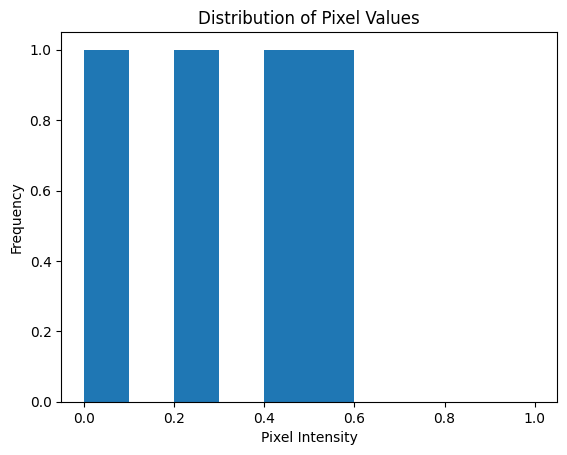

In [3]:
# Flatten the array to make it a 1D array for the histogram
flattened_array = array_2010.flatten()

# Plotting the histogram
plt.hist(flattened_array, bins=10, range=(0,1))  # 10 bins for the range 0 to 1
plt.title('Distribution of Pixel Values')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

[[-1 -1]
 [ 0  1]]


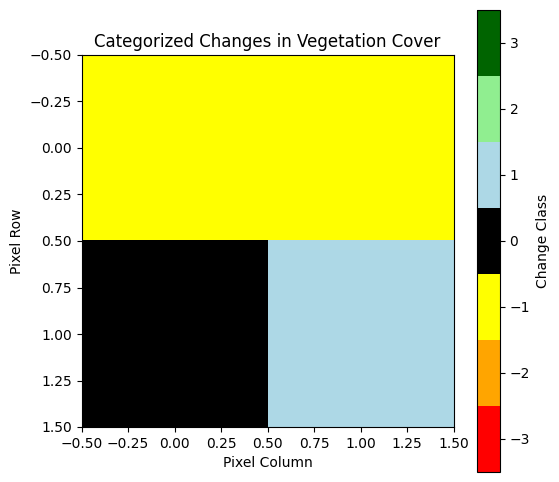

[[0.2  0.5 ]
 [0.03 0.4 ]]
[[0.   0.4 ]
 [0.05 0.6 ]]


In [5]:
from matplotlib.colors import ListedColormap

# def categorize_change(value):
#     if 0 < value <= 0.33:
#         return 1
#     elif 0.33 < value <= 0.66:
#         return 2
#     elif 0.66 < value <= 1:
#         return 3
#     elif -0.33 <= value < 0:
#         return -1
#     elif -0.66 <= value < -0.33:
#         return -2
#     elif -1 <= value < -0.66:
#         return -3
#     else:
#         return 0

def categorize_change(value):
    if 0 < value <= 0.25:
        return 1
    elif 0.25 < value <= 0.5:
        return 2
    elif 0.5 < value <= 0.75:
        return 3
    elif 0.75 < value <= 1:
        return 4
    elif -0.25 <= value < 0:
        return -1
    elif -0.5 <= value < -0.25:
        return -2
    elif -0.75 <= value < -0.5:
        return -3
    elif -1 <= value < -0.75:
        return -4
    else:
        return 0
    
# Custom colormap: black, yellow-orange-red for negatives, black, lightblue-green-dark green for positives
colors = ['red', 'orange', 'yellow', 'black', 'lightblue', 'lightgreen', 'darkgreen']
cmap = ListedColormap(colors)
bounds = [-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
norm = plt.Normalize(min(bounds), max(bounds))


# Setting the threshold
threshold = 0.111

# Calculating changes where either of the values is greater than the threshold
change_detection = np.where((array_2010 > threshold) | (array_2011 > threshold), array_2011 - array_2010, 0)

# Vectorizing the categorize_change function to apply it element-wise
categorize_change_vectorized = np.vectorize(categorize_change)

# Applying the categorization to the change_detection array
categorized_changes = categorize_change_vectorized(change_detection)

print(categorized_changes)

# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(categorized_changes, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(ticks=np.arange(-3, 4), label='Change Class')
plt.title('Categorized Changes in Vegetation Cover')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()

print(array_2010)
print(array_2011)

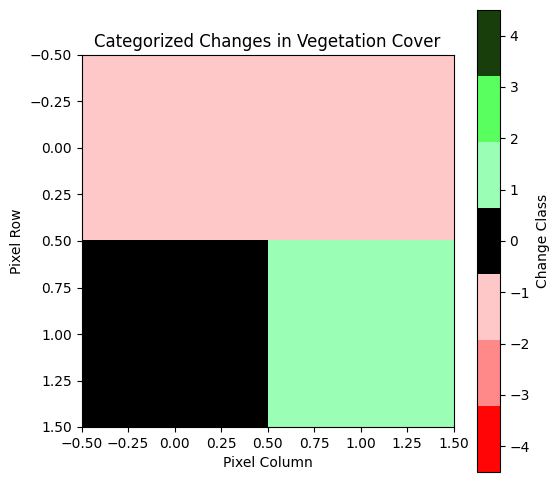

In [22]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def categorize_change(value):
    if 0 < value <= 0.25:
        return 1
    elif 0.25 < value <= 0.5:
        return 2
    elif 0.5 < value <= 0.75:
        return 3
    elif 0.75 < value <= 1:
        return 4
    elif -0.25 <= value < 0:
        return -1
    elif -0.5 <= value < -0.25:
        return -2
    elif -0.75 <= value < -0.5:
        return -3
    elif -1 <= value < -0.75:
        return -4
    else:
        return 0
    
# Adjusted color mapping to include darker shades for higher absolute values
colors = ['#FF0505', '#FF8989', '#FFC8C8', 'black', '#9AFFB4', '#58FF5F', '#183E0C']  # Dark red, red, orange, black, light green, green, dark green
cmap = ListedColormap(colors)
bounds = [-4.5, -3.5, -2.5, -1.5, 0.5, 1.5, 2.5, 3.5, 4.5]  # Adjusted to include bounds for all categories
norm = plt.Normalize(min(bounds), max(bounds))

# Assuming array_2010 and array_2011 are defined earlier in your code
# Setting the threshold
threshold = 0.111

# Calculating changes where either of the values is greater than the threshold
change_detection = np.where((array_2010 > threshold) | (array_2011 > threshold), array_2011 - array_2010, 0)

# Vectorizing the categorize_change function to apply it element-wise
categorize_change_vectorized = np.vectorize(categorize_change)

# Applying the categorization to the change_detection array
categorized_changes = categorize_change_vectorized(change_detection)

# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(categorized_changes, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(ticks=np.arange(-4, 5), label='Change Class')  # Adjusted tick marks to include all categories
plt.title('Categorized Changes in Vegetation Cover')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()
